# Neural Networks
In this notebook we will practice using the Keras library to access Google Tensorflow functionality.  This library will allow us to train and test a neural network and we will practice how to size and shape the network.  

You will need to install the tensorflow library using 
***pip install tensorflow*** in your Anaconda command window.  Make sure you use ***pip*** and not ***conda*** as the official instructions say that tensorflow is not ready to be used with conda for installation (https://www.tensorflow.org/install/pip).  
Steps:
* load the Anaconda command prompt with Administrative Rights
* type **pip install tensorflow** and hit enter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

np.random.seed(1)

### Data loading and preparation

In [5]:
# Read in the DPA datasest from Module 1
X = pd.read_csv("DPA_Data_Small.csv").values
y = pd.read_csv("DPA_target.csv", index_col=0)
y = np.array(y).ravel()

Remember that the DPA dataset has Radio Frequency (RF) data as observations, where each variable is the power reading at a particular time sample.  The target is one of 8 Hamming Weights, which indicate how many bits are high in the memory unit of the chip for that observation.  

Let's simplify this problem by looking at only 2 classes

In [3]:
class1 = 2
class2 = 6

In [6]:
X_2class = X[((y==class1) | (y==class2)),:]
y_2class = y[(y==class1) | (y==class2)]
X_2class.shape

(224, 59)

In [7]:
# Need to convert classes to 0 and 1
y_2class[y_2class==class1]=0
y_2class[y_2class==class2]=1

In [8]:
# Split to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2class, y_2class, test_size=0.3, random_state=1)

We need to scale the data for the neural network training.   It's important to learn the scaling parameters with just the training set so that you can apply those to the test set.  Because in reality you will only have the training set beforehand and you would normally just learn the scaling parameters with the training set and apply it to the test set.   

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

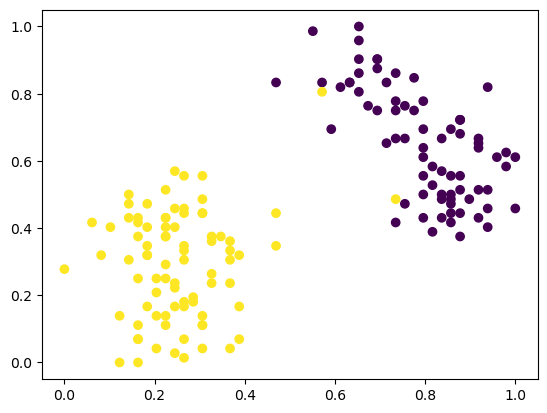

In [10]:
plt.scatter(X_train[:,2],X_train[:,3],c=y_train)
plt.show()

### Training the model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#help(Sequential)

This is the NN we are trying to build: 
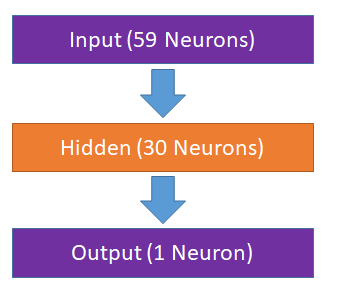

In [13]:
model = Sequential()

model.add(Dense(59,activation="relu"))
model.add(Dense(30,activation="relu"))

model.add(Dense(1,activation='sigmoid'))  

We will be using the **Adam** optimizer which is the adaptive gradient descent algorithm, which usually converges quicker with better results than others.  

While MSE is more useful for an estimation type problem, here we have a binary classification problem.  For the loss function for this problem, we will be using the **binary_crossentropy** loss function.  To see more information on when to use which loss function, see this link: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [14]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [15]:
model.fit(x = X_train, y=y_train,epochs=100)
# later we can see how to find the number epochs better

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 0.6790
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5977
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5245
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4657
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4062
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.3523
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2990
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2511
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.2067
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1679
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1339
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1067
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

Now let's plot the error throughout the epochs

<AxesSubplot:>

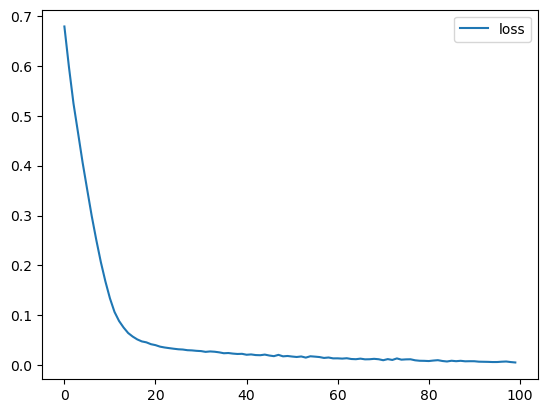

In [16]:
loss = pd.DataFrame(model.history.history)
loss.plot()

### Evaluate Model
Let's explore various ways to evaluate the model

In [17]:
# overall loss for test set
model.evaluate(x=X_test, y=y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.0535


0.05346374958753586

In [18]:
# record all predictions
ypred = model.predict(X_test)

3/3 [==============================] - 0s 5ms/step


***Curiosity Points (5 Points)*** Examine the code below to see the exact outputs of the NN for the predictions and compare them with the original class labels for the test set.  Then round the numbers and print the classification report.  

In [19]:
ypred[0:6]

array([[2.7101943e-03],
       [9.9995649e-01],
       [4.5666946e-03],
       [9.9995852e-01],
       [2.4552955e-04],
       [9.9991739e-01]], dtype=float32)

In [20]:
y_test[0:6]

array([0, 1, 0, 1, 0, 1], dtype=int64)

In [21]:
ypred2 = np.round(ypred)

In [22]:
ypred2[0:6]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        41

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



### Saving and loading the model
This allows it to be exported and used in future notebooks if desired

In [24]:
# Save Model
model.save("FirstNN.H5")

INFO:tensorflow:Assets written to: FirstNN.H5\assets


INFO:tensorflow:Assets written to: FirstNN.H5\assets


In [25]:
# Example of loading Model (for practice)
from tensorflow.keras.models import load_model
model2 = load_model("FirstNN.H5")

## Fine Tuning your Neural Network
### Validation set
Use a validation set while you are running each epoch to see how the loss on separate data is doing as you train.  This can prevent overtraining.  

In [26]:
model = Sequential()

model.add(Dense(59,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model.compile(optimizer="adam", loss="binary_crossentropy")

model.fit(x = X_train, y=y_train,epochs=250,validation_data=(X_test,y_test)) #training many more epochs for next section

Epoch 1/250
5/5 [==============================] - 1s 36ms/step - loss: 0.6698 - val_loss: 0.6565
Epoch 2/250
5/5 [==============================] - 0s 15ms/step - loss: 0.6023 - val_loss: 0.5853
Epoch 3/250
5/5 [==============================] - 0s 11ms/step - loss: 0.5413 - val_loss: 0.5170
Epoch 4/250
5/5 [==============================] - 0s 16ms/step - loss: 0.4769 - val_loss: 0.4511
Epoch 5/250
5/5 [==============================] - 0s 13ms/step - loss: 0.4080 - val_loss: 0.3718
Epoch 6/250
5/5 [==============================] - 0s 13ms/step - loss: 0.3408 - val_loss: 0.3054
Epoch 7/250
5/5 [==============================] - 0s 12ms/step - loss: 0.2765 - val_loss: 0.2472
Epoch 8/250
5/5 [==============================] - 0s 12ms/step - loss: 0.2186 - val_loss: 0.1947
Epoch 9/250
5/5 [==============================] - 0s 12ms/step - loss: 0.1709 - val_loss: 0.1484
Epoch 10/250
5/5 [==============================] - 0s 14ms/step - loss: 0.1292 - val_loss: 0.1155
Epoch 11/250
5/5 [=

Epoch 84/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0058 - val_loss: 0.0470
Epoch 85/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0060 - val_loss: 0.0454
Epoch 86/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0055 - val_loss: 0.0429
Epoch 87/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0055 - val_loss: 0.0439
Epoch 88/250
5/5 [==============================] - 0s 10ms/step - loss: 0.0058 - val_loss: 0.0478
Epoch 89/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0051 - val_loss: 0.0459
Epoch 90/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0055 - val_loss: 0.0406
Epoch 91/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0052 - val_loss: 0.0432
Epoch 92/250
5/5 [==============================] - 0s 10ms/step - loss: 0.0045 - val_loss: 0.0496
Epoch 93/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0061 - val_loss: 0.0511
Epoch 94/2

5/5 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 0.0540
Epoch 167/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0549
Epoch 168/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.0555
Epoch 169/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0548
Epoch 170/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 0.0548
Epoch 171/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.0565
Epoch 172/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0560
Epoch 173/250
5/5 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 0.0558
Epoch 174/250
5/5 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0547
Epoch 175/250
5/5 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 0.0548
Epoch 176/250


5/5 [==============================] - 0s 12ms/step - loss: 4.8029e-04 - val_loss: 0.0621
Epoch 246/250
5/5 [==============================] - 0s 10ms/step - loss: 4.7606e-04 - val_loss: 0.0626
Epoch 247/250
5/5 [==============================] - 0s 11ms/step - loss: 4.7461e-04 - val_loss: 0.0626
Epoch 248/250
5/5 [==============================] - 0s 12ms/step - loss: 4.8287e-04 - val_loss: 0.0645
Epoch 249/250
5/5 [==============================] - 0s 10ms/step - loss: 4.6636e-04 - val_loss: 0.0634
Epoch 250/250
5/5 [==============================] - 0s 12ms/step - loss: 4.6919e-04 - val_loss: 0.0620


(0.0, 0.1)

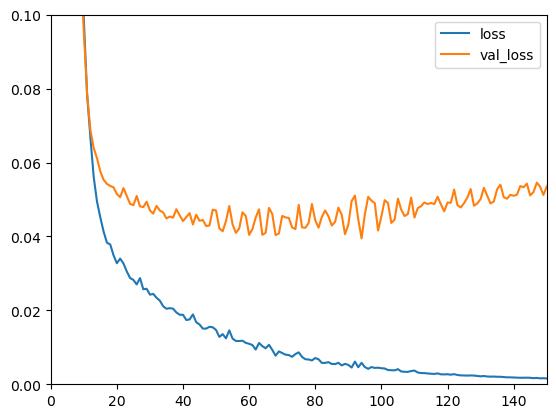

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.xlim([0,150])
plt.ylim([0,0.1])

It looks like the validation loss starts to stop decreasing around 10 epochs and starts to increase after 60 epochs (change the xlim and ylim settings to zoom in)

### Call-backs for Early Stopping
Monitor Valudation-Loss to stop after a certain condition.  

In [ ]:
''' from tensorflow.keras.layers import Dropout
model2 = Sequential()

model2.add(Dense(59,activation="relu"))
model2.add(Dense(30,activation="relu"))
model2.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model2.compile(optimizer="Adam", loss="binary_crossentropy") '''

In the function below:
* **monitor** is what you are ... monitoriing.  
 * In this case we are keeping an eye on the validation set loss 
* **mode** is when you want to start monitoring.  
 * In this case, we want the minimum validation loss
* **patience** is how many epochs to keep going after we notice that the val_loss has stopped going down
 * This accounts for noise between epochs

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [29]:
model.fit(x = X_train, y=y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[earlyStop])

Epoch 1/250
5/5 [==============================] - 0s 17ms/step - loss: 4.5960e-04 - val_loss: 0.0627
Epoch 2/250
5/5 [==============================] - 0s 13ms/step - loss: 4.4897e-04 - val_loss: 0.0637
Epoch 3/250
5/5 [==============================] - 0s 10ms/step - loss: 4.4694e-04 - val_loss: 0.0645
Epoch 4/250
5/5 [==============================] - 0s 13ms/step - loss: 4.4089e-04 - val_loss: 0.0646
Epoch 5/250
5/5 [==============================] - 0s 11ms/step - loss: 4.4569e-04 - val_loss: 0.0647
Epoch 6/250
5/5 [==============================] - 0s 11ms/step - loss: 4.3525e-04 - val_loss: 0.0637
Epoch 7/250
5/5 [==============================] - 0s 12ms/step - loss: 4.3779e-04 - val_loss: 0.0625
Epoch 8/250
5/5 [==============================] - 0s 10ms/step - loss: 4.4234e-04 - val_loss: 0.0645
Epoch 9/250
5/5 [==============================] - 0s 12ms/step - loss: 4.2191e-04 - val_loss: 0.0644
Epoch 10/250
5/5 [==============================] - 0s 12ms/step - loss: 4.1716e-0

Early Stop will end differently for different runs due to randomness instructions behind the scenes in Keras.

### Drop Off Neurons
Some neurons can be "turned off" during training to prevent overfitting.  These neurons pass the input directly to the output, acting as a wire.  Below we will set a certain percentage of randomly chosen neurons to turn off at each epoch.  Generally between 30% and 50% is a good setting.  

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()

model.add(Dense(59,activation="relu"))
model.add(Dropout(0.3)) # 30% of randomly chosen neurons in the layer are turned off in each epoch 

model.add(Dense(30,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model.compile(optimizer="Adam", loss="binary_crossentropy")

model.fit(x = X_train, y=y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[earlyStop]) #use in combination with early stopping

Epoch 1/250
5/5 [==============================] - 1s 37ms/step - loss: 0.6980 - val_loss: 0.6407
Epoch 2/250
5/5 [==============================] - 0s 15ms/step - loss: 0.6157 - val_loss: 0.5627
Epoch 3/250
5/5 [==============================] - 0s 12ms/step - loss: 0.5528 - val_loss: 0.5001
Epoch 4/250
5/5 [==============================] - 0s 13ms/step - loss: 0.4887 - val_loss: 0.4394
Epoch 5/250
5/5 [==============================] - 0s 13ms/step - loss: 0.4511 - val_loss: 0.3782
Epoch 6/250
5/5 [==============================] - 0s 10ms/step - loss: 0.3889 - val_loss: 0.3232
Epoch 7/250
5/5 [==============================] - 0s 15ms/step - loss: 0.3477 - val_loss: 0.2739
Epoch 8/250
5/5 [==============================] - 0s 13ms/step - loss: 0.3205 - val_loss: 0.2343
Epoch 9/250
5/5 [==============================] - 0s 10ms/step - loss: 0.2608 - val_loss: 0.2007
Epoch 10/250
5/5 [==============================] - 0s 11ms/step - loss: 0.2183 - val_loss: 0.1725
Epoch 11/250
5/5 [=

In [33]:
losses = pd.DataFrame(model.history.history)

Text(15, 0.4, 'Better: training and validation losses\n are closer together')

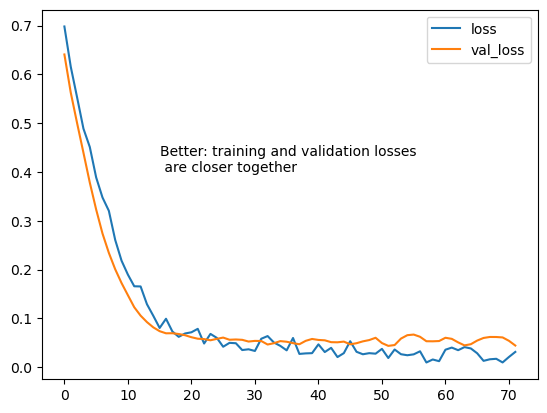

In [34]:
losses.plot()
plt.text(x=15,y=0.4,s="Better: training and validation losses\n are closer together")

Better here because training and validation loss is closer together

 ### Classification Metrics

In [35]:
ypred = model.predict(X_test)
ypred = ypred.round()

from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        41

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [36]:
# Save Optimized Model
model.save("OptimizedNN.H5")

INFO:tensorflow:Assets written to: OptimizedNN.H5\assets


INFO:tensorflow:Assets written to: OptimizedNN.H5\assets
